In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [23]:
with open("../tasks/04/results/rolling_stats_all.txt", "r") as f:
    lines = f.readlines()
    lines = [json.loads(line.split("value:")[1].strip().replace("'", "\"")) for line in lines]

for line in lines:
    # ignore the vehicle makes for now
    del line["vehicle_make"]

In [46]:
df = pd.DataFrame(lines)
df = df.astype(float)
df

,vehicle_year_mean,vehicle_year_std,vehicle_year_min,vehicle_year_max,vehicle_year_per_25,vehicle_year_per_50,vehicle_year_per_75
0,2000.823529,7.568476,1986.0,2012.0,1995.75,2002.5,2007.00
1,2004.396226,5.562027,1987.0,2012.0,2001.00,2005.0,2008.00
2,2002.581818,6.911319,1988.0,2012.0,1998.00,2002.0,2008.00
3,2003.672727,6.787937,1987.0,2012.0,1999.00,2005.0,2009.50
4,2002.758065,6.595293,1987.0,2012.0,1999.50,2004.0,2006.75
5,2005.102941,5.905069,1987.0,2012.0,2002.75,2007.0,2009.25
6,2000.517857,8.061110,1986.0,2012.0,1995.00,2003.5,2006.00
7,2006.145161,5.841757,1989.0,2012.0,2002.25,2008.0,2011.00
8,2005.780488,5.574550,1990.0,2012.0,2003.00,2006.0,2011.00
9,2005.746269,4.626483,1996.0,2012.0,2003.00,2007.0,2009.50


In [47]:
df_melted = df.reset_index().melt(id_vars=['index'], value_vars=['vehicle_year_mean', 'vehicle_year_std', 'vehicle_year_min', 'vehicle_year_max', 'vehicle_year_per_25', 'vehicle_year_per_50', 'vehicle_year_per_75'])
df_melted.columns = ['Stream Index', 'Statistic', 'Value']
df_melted

,Stream Index,Statistic,Value
0,0,vehicle_year_mean,2000.823529
1,1,vehicle_year_mean,2004.396226
2,2,vehicle_year_mean,2002.581818
3,3,vehicle_year_mean,2003.672727
4,4,vehicle_year_mean,2002.758065
...,...,...,...
65,5,vehicle_year_per_75,2009.250000
66,6,vehicle_year_per_75,2006.000000
67,7,vehicle_year_per_75,2011.000000
68,8,vehicle_year_per_75,2011.000000


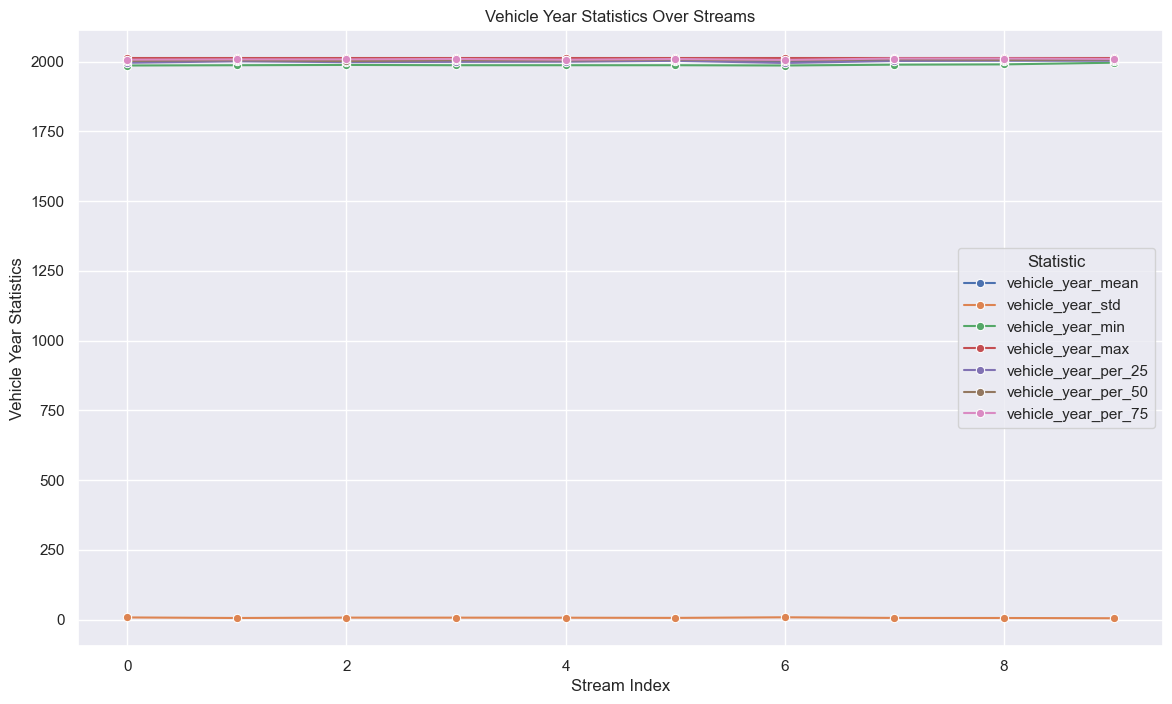

In [48]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Stream Index', y='Value', hue='Statistic', marker='o')
plt.xlabel('Stream Index')
plt.ylabel('Vehicle Year Statistics')
plt.title('Vehicle Year Statistics Over Streams')
plt.legend(title='Statistic')
plt.grid(True)
plt.show()

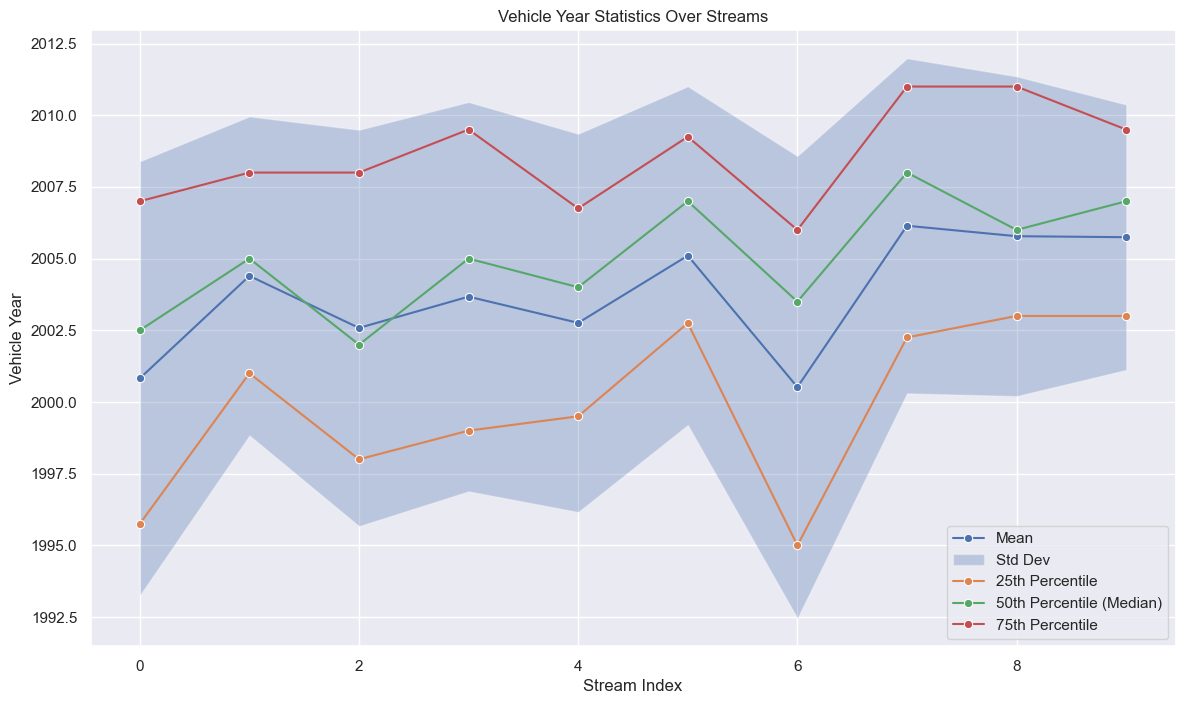

In [49]:
# Create the plot
plt.figure(figsize=(14, 8))

# Plot the mean
sns.lineplot(x=range(len(df)), y='vehicle_year_mean', data=df, marker='o', label='Mean')

# Plot the standard deviation as a shaded area
plt.fill_between(x=range(len(df)),  y1=df['vehicle_year_mean'] - df['vehicle_year_std'],  y2=df['vehicle_year_mean'] + df['vehicle_year_std'], alpha=0.3, label='Std Dev')

# Plot the percentiles
sns.lineplot(x=range(len(df)), y='vehicle_year_per_25', data=df, marker='o', label='25th Percentile')
sns.lineplot(x=range(len(df)), y='vehicle_year_per_50', data=df, marker='o', label='50th Percentile (Median)')
sns.lineplot(x=range(len(df)), y='vehicle_year_per_75', data=df, marker='o', label='75th Percentile')

# Adding labels and title
plt.xlabel('Stream Index')
plt.ylabel('Vehicle Year')
plt.title('Vehicle Year Statistics Over Streams')
plt.legend()
plt.grid(True)
plt.show()